Ques 1

In [1]:
from PIL import Image

In [2]:
def resize_image(input_path, output_path, scale_factor):
    try:
        # Open the image file
        original_image = Image.open(input_path)

        # Get the original size of the image
        original_size = original_image.size

        # Calculate the new size based on the scale factor
        new_size = tuple(int(dim * scale_factor) for dim in original_size)

        # Resize the image
        resized_image = original_image.resize(new_size)

        # Save the resized image to the specified output path
        resized_image.save(output_path)

        print(f"Image resized and saved to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

In [3]:
# Get user input for the image file name
input_image_path = input("Enter the name of the input image file (with extension): ")

# Resize to 30%
resize_image(input_image_path, 'resized_30.jpg', 0.3)

# Resize to 60%
resize_image(input_image_path, 'resized_60.jpg', 0.6)

# Resize to 90%
resize_image(input_image_path, 'resized_90.jpg', 0.9)


Enter the name of the input image file (with extension): Image 1
Error: [Errno 2] No such file or directory: 'Image 1'
Error: [Errno 2] No such file or directory: 'Image 1'
Error: [Errno 2] No such file or directory: 'Image 1'


Ques 2

In [4]:
import pandas as pd
import numpy as np
from numpy.linalg import eigh
from scipy.linalg import svd

In [5]:
data = pd.read_csv('libras Movement.csv')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398,1
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213,1
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778,1
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306,1
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259,1


In [6]:
print(data.shape)
data.tail()

(360, 91)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
355,0.65957,0.79167,0.65764,0.78704,0.65957,0.78935,0.65957,0.78704,0.65764,0.78241,...,0.55093,0.57253,0.53935,0.56286,0.53241,0.55126,0.52546,0.54159,0.52083,15
356,0.64023,0.71991,0.64217,0.71759,0.64217,0.71759,0.64217,0.71759,0.64217,0.71991,...,0.50463,0.55513,0.50231,0.54352,0.49769,0.53191,0.49537,0.52031,0.49306,15
357,0.61122,0.75926,0.61122,0.75694,0.61315,0.75694,0.61122,0.75694,0.61122,0.75926,...,0.54167,0.48549,0.53472,0.47195,0.52546,0.45841,0.52083,0.44487,0.51620,15
358,0.65957,0.79167,0.65764,0.78704,0.65957,0.78935,0.65957,0.78704,0.65764,0.78241,...,0.55093,0.57253,0.53935,0.56286,0.53241,0.55126,0.52546,0.54159,0.52083,15
359,0.64023,0.71991,0.64217,0.71759,0.64217,0.71759,0.64217,0.71759,0.64217,0.71991,...,0.50463,0.55513,0.50231,0.54352,0.49769,0.53191,0.49537,0.52031,0.49306,15


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 91 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   360 non-null    float64
 1   Unnamed: 1   360 non-null    float64
 2   Unnamed: 2   360 non-null    float64
 3   Unnamed: 3   360 non-null    float64
 4   Unnamed: 4   360 non-null    float64
 5   Unnamed: 5   360 non-null    float64
 6   Unnamed: 6   360 non-null    float64
 7   Unnamed: 7   360 non-null    float64
 8   Unnamed: 8   360 non-null    float64
 9   Unnamed: 9   360 non-null    float64
 10  Unnamed: 10  360 non-null    float64
 11  Unnamed: 11  360 non-null    float64
 12  Unnamed: 12  360 non-null    float64
 13  Unnamed: 13  360 non-null    float64
 14  Unnamed: 14  360 non-null    float64
 15  Unnamed: 15  360 non-null    float64
 16  Unnamed: 16  360 non-null    float64
 17  Unnamed: 17  360 non-null    float64
 18  Unnamed: 18  360 non-null    float64
 19  Unnamed:

There are no null values in the give data frame,so no need of cleaning of null values.

In [8]:
Y=data[data.columns[-1]]
data.drop([data.columns[-1]],axis=1,inplace=True)#last column is target variable on which PDA whould not be applied

In [9]:
arr_data = data.values
arr_data

array([[0.79691, 0.38194, 0.79691, ..., 0.3125 , 0.6383 , 0.29398],
       [0.67892, 0.27315, 0.68085, ..., 0.69213, 0.17215, 0.69213],
       [0.72147, 0.23611, 0.7234 , ..., 0.2662 , 0.78143, 0.27778],
       ...,
       [0.61122, 0.75926, 0.61122, ..., 0.52083, 0.44487, 0.5162 ],
       [0.65957, 0.79167, 0.65764, ..., 0.52546, 0.54159, 0.52083],
       [0.64023, 0.71991, 0.64217, ..., 0.49537, 0.52031, 0.49306]])

In [10]:
arr_data_m = np.mean(arr_data,axis=0)
arr_data_m

array([0.56661325, 0.55596689, 0.56637685, 0.55547825, 0.56564037,
       0.55455239, 0.56486666, 0.55285458, 0.56309383, 0.548579  ,
       0.55974647, 0.54293361, 0.55419078, 0.53555814, 0.54647033,
       0.52764883, 0.53768006, 0.52085256, 0.52837436, 0.51503333,
       0.52021803, 0.50986358, 0.51194908, 0.50610839, 0.50458302,
       0.50349765, 0.49856556, 0.50140791, 0.49499791, 0.50120247,
       0.49379978, 0.50110586, 0.49510535, 0.50115728, 0.49737253,
       0.50075225, 0.49994644, 0.50097742, 0.50208483, 0.50251408,
       0.50476014, 0.50595406, 0.50795742, 0.51131017, 0.51039136,
       0.517136  , 0.51251348, 0.52258219, 0.51390472, 0.52682   ,
       0.51454447, 0.52876792, 0.51346434, 0.52775214, 0.51196544,
       0.52514794, 0.51011173, 0.52115475, 0.50878474, 0.517329  ,
       0.50696872, 0.51317517, 0.50448621, 0.51087991, 0.50192352,
       0.5092981 , 0.49873211, 0.50706681, 0.49482061, 0.50475198,
       0.49165615, 0.50243688, 0.4894905 , 0.49814167, 0.48793

In [11]:
#calculating covariance matrix
cent = arr_data-arr_data_m#don't confuse with unmatching of dimension,broadcasting occurs
cov = (1/len(cent))*(cent.T@cent)#fromula of covariance matrix
cov

array([[ 0.03945747,  0.0070211 ,  0.03932727, ...,  0.00045467,
        -0.01164146,  0.0008597 ],
       [ 0.0070211 ,  0.03505292,  0.00694779, ..., -0.00949376,
        -0.00926899, -0.00916321],
       [ 0.03932727,  0.00694779,  0.03921588, ...,  0.00049866,
        -0.01157567,  0.00090275],
       ...,
       [ 0.00045467, -0.00949376,  0.00049866, ...,  0.03390292,
        -0.00554827,  0.03475947],
       [-0.01164146, -0.00926899, -0.01157567, ..., -0.00554827,
         0.05071221, -0.00681114],
       [ 0.0008597 , -0.00916321,  0.00090275, ...,  0.03475947,
        -0.00681114,  0.03631531]])

In [12]:
eigval, eigvec = eigh(cov)
print(eigvec.shape)
idx = eigval.argsort()[::-1]#getting decreasing order of eigen values
eigval = eigval[idx]#sorting sorting eigen vectors in decreasing arder according to eigen values
eigvec = eigvec[:,idx]
eigvec
#print(len(idx))

(90, 90)


array([[-1.55019761e-01,  1.18564001e-01,  1.09477385e-01, ...,
        -1.45579107e-01, -1.40624123e-01, -2.27075448e-01],
       [-1.42167198e-01,  5.47398170e-03, -1.69662198e-01, ...,
        -1.00051145e-01, -6.36389847e-02,  2.44846136e-02],
       [-1.54429120e-01,  1.18778142e-01,  1.09476260e-01, ...,
         1.54326609e-01,  2.38814126e-01,  5.39012565e-01],
       ...,
       [ 2.12720411e-03, -8.83328660e-02,  1.58178331e-01, ...,
         5.58550993e-03, -2.72524127e-04, -3.05660467e-03],
       [ 1.89052181e-01,  9.25119161e-02, -6.47395069e-02, ...,
         7.04727479e-03, -3.04519938e-02,  1.72034892e-02],
       [-2.01845773e-03, -8.96395881e-02,  1.62058671e-01, ...,
        -5.74708774e-03,  5.27172955e-03, -5.88838931e-03]])

In [13]:
#run the following cells to verify that principal components are orthogonoal to each other.
#(i am commenting this because,this will many lines and not neccessary)
'''for i in range(0,len(eigvec[0])-1):
    for j in range(0,len(eig[0])-1):
        if i!=j:
            print(float(np.dot(eigvec[:,i],eigvec[:,j])))'''

'for i in range(0,len(eigvec[0])-1):\n    for j in range(0,len(eig[0])-1):\n        if i!=j:\n            print(float(np.dot(eigvec[:,i],eigvec[:,j])))'

covariance captured in a dimension(in one of eigen vector) is propotional to eigen value.So, we have to find number of eigen vectors to be used to get desired percentage of data.

In [14]:
#to know which componenents capture how much variance:(for first 10 components)
Q = sum(eigval)
for i in range(10):
    print('Percentage of variance captured by {}th principal component: {} '.format(i,(eigval[i]/Q)*100)  )

Percentage of variance captured by 0th principal component: 25.096891494722556 
Percentage of variance captured by 1th principal component: 22.059426021834433 
Percentage of variance captured by 2th principal component: 18.093573650159126 
Percentage of variance captured by 3th principal component: 10.480391752302818 
Percentage of variance captured by 4th principal component: 6.550805059494029 
Percentage of variance captured by 5th principal component: 4.9488327220939015 
Percentage of variance captured by 6th principal component: 3.472032677279417 
Percentage of variance captured by 7th principal component: 2.9123186163615986 
Percentage of variance captured by 8th principal component: 2.053419737979947 
Percentage of variance captured by 9th principal component: 1.6262213691302985 


In [15]:
def dim(eigval,ratio):#assuming that 0 is not given in ratio
    ind,temp_sum,total = 0,eigval[0],np.sum(eigval)
    for ind in range(1,len(eigval)):
        if temp_sum/total>=ratio:break
        else:
            temp_sum+=eigval[ind]
    return ind

dim(eigval,0.95)=9#requires minimum of 9 dimesnion to captue 95 % of covariance

Applying PCA by projecting centered data and original data onto required number of eigen vectors,depending on required percentage of variance to be captured).I am using minimum number of dimensions that should be used to capture required amount of variance.

In [16]:
#1:For 60% data
d = dim(eigval,60/100)
print(d)
e_vector = eigvec[0:d,:]
pca_data_60 = cent@e_vector.T
pca_data_60_X = arr_data@e_vector.T
pca_data_60

3


array([[ 0.52203199,  0.02753206,  0.28962325],
       [ 0.45375487,  0.20849182,  0.36371997],
       [ 0.52476628,  0.12750554,  0.39223316],
       ...,
       [ 0.00371511,  0.19983207, -0.02347587],
       [ 0.0243765 ,  0.27466246, -0.0218009 ],
       [ 0.03285834,  0.26081456, -0.01232191]])

In [17]:
#1:For 75% data
d = dim(eigval,75/100)
print(d)
e_vector = eigvec[0:d,:]
pca_data_75 = cent@e_vector.T
pca_data_75_X = arr_data@e_vector.T
pca_data_75

4


array([[ 0.52203199,  0.02753206,  0.28962325, -0.00851103],
       [ 0.45375487,  0.20849182,  0.36371997, -0.30351223],
       [ 0.52476628,  0.12750554,  0.39223316, -0.08117638],
       ...,
       [ 0.00371511,  0.19983207, -0.02347587,  0.20746056],
       [ 0.0243765 ,  0.27466246, -0.0218009 ,  0.25777481],
       [ 0.03285834,  0.26081456, -0.01232191,  0.14649036]])

In [18]:
#1:For 90% data
d = dim(eigval,90/100)
print(d)
e_vector = eigvec[0:d,:]
pca_data_90 = cent@e_vector.T#projecting centered data
pca_data_90_X = arr_data@e_vector.T#projecting original data
pca_data_90

7


array([[ 0.52203199,  0.02753206,  0.28962325, ...,  0.14595743,
        -0.34691041, -0.16697241],
       [ 0.45375487,  0.20849182,  0.36371997, ...,  0.13325836,
        -0.13123948, -0.21352429],
       [ 0.52476628,  0.12750554,  0.39223316, ...,  0.08320104,
        -0.30561649, -0.18039527],
       ...,
       [ 0.00371511,  0.19983207, -0.02347587, ..., -0.11050009,
        -0.12800044, -0.08601877],
       [ 0.0243765 ,  0.27466246, -0.0218009 , ..., -0.11896687,
        -0.18039684, -0.02530082],
       [ 0.03285834,  0.26081456, -0.01232191, ..., -0.07815117,
        -0.15392007, -0.03831254]])

Final Data Frames

In [19]:
pca_df_60,pca_df_75,pca_df_90 = pd.DataFrame(pca_data_60),pd.DataFrame(pca_data_75),pd.DataFrame(pca_data_90)#for centered data

In [20]:
pca_df_60_X,pca_df_75_X,pca_df_90_X = pd.DataFrame(pca_data_60_X),pd.DataFrame(pca_data_75_X),pd.DataFrame(pca_data_90_X)#for original data

In [21]:
U,S,Vt = svd(data)
mat_S =np.diag(S)

In [22]:
print(np.sum((S)))

194.42901425548584


In [23]:
for i in range(0,10):
    print( 'Percentage of variance explained by {}th component: {}'.format( i, (S[i]**2)/np.sum(np.square(S))*100 ) )

Percentage of variance explained by 0th component: 90.86140374212084
Percentage of variance explained by 1th component: 2.6161877399527773
Percentage of variance explained by 2th component: 1.9394992927121342
Percentage of variance explained by 3th component: 1.9154176297048742
Percentage of variance explained by 4th component: 0.7387300124087858
Percentage of variance explained by 5th component: 0.5408433009848994
Percentage of variance explained by 6th component: 0.38519828264281375
Percentage of variance explained by 7th component: 0.31031164220589447
Percentage of variance explained by 8th component: 0.22646955019623
Percentage of variance explained by 9th component: 0.17505763347030406


In [24]:
def req_dim(S,ratio):
    tot = np.sum(np.square(S))
    acq_sum = S[0]**2#acquired sum till now..
    ind = 0
    for ind in range(1,len(S)):
        if acq_sum/tot >= ratio:break#acq_sum is num upto ind-1
        else:
            acq_sum+=S[ind]**2
    return ind

In [25]:
#for 60%:
per = 60
s_60=req_dim(S,per/100)#required number of singular values
svd_data_60 = U[:,:s_60]@mat_S[:s_60,:s_60]@Vt[:s_60,:]

In [26]:
#for 75%:
per = 75
s_75=req_dim(S,per/100)
svd_data_75 = U[:,:s_75]@mat_S[:s_75,:s_75]@Vt[:s_75,:]

In [27]:
#for 90%:
per = 90
s_90=req_dim(S,per/100)
svd_data_90 = U[:,:s_90]@mat_S[:s_90,:s_90]@Vt[:s_90,:]

In [28]:
svd_df_60,svd_df_75,svd_df_90 = pd.DataFrame(svd_data_60),pd.DataFrame(svd_data_75),pd.DataFrame(svd_data_90)

In [29]:
print(svd_df_60,svd_df_75,svd_df_90,sep='\n')

           0         1         2         3         4         5         6   \
0    0.544294  0.529455  0.544082  0.529013  0.543461  0.528205  0.542681   
1    0.462927  0.450306  0.462746  0.449930  0.462218  0.449242  0.461554   
2    0.512588  0.498614  0.512388  0.498197  0.511804  0.497436  0.511069   
3    0.418275  0.406872  0.418112  0.406531  0.417635  0.405910  0.417035   
4    0.605289  0.588787  0.605052  0.588295  0.604362  0.587396  0.603494   
..        ...       ...       ...       ...       ...       ...       ...   
355  0.753908  0.733355  0.753614  0.732742  0.752754  0.731622  0.751673   
356  0.707201  0.687921  0.706925  0.687346  0.706118  0.686296  0.705104   
357  0.713264  0.693819  0.712986  0.693239  0.712172  0.692180  0.711150   
358  0.753908  0.733355  0.753614  0.732742  0.752754  0.731622  0.751673   
359  0.707201  0.687921  0.706925  0.687346  0.706118  0.686296  0.705104   

           7         8         9   ...        80        81        82  \
0  

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
DF,DF_X = pca_df_60,pca_df_60_X

Knowing the data

In [32]:
print(DF.info(),DF_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       360 non-null    float64
 1   1       360 non-null    float64
 2   2       360 non-null    float64
dtypes: float64(3)
memory usage: 8.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       360 non-null    float64
 1   1       360 non-null    float64
 2   2       360 non-null    float64
dtypes: float64(3)
memory usage: 8.6 KB
None None


In [33]:
print(DF.describe(),DF_X.describe(),sep='\n')

                  0             1             2
count  3.600000e+02  3.600000e+02  3.600000e+02
mean   9.868649e-18 -7.401487e-17  2.467162e-17
std    1.504644e-01  2.703435e-01  1.520496e-01
min   -3.936048e-01 -7.367102e-01 -3.652395e-01
25%   -9.360224e-02 -1.722273e-01 -9.768642e-02
50%   -1.416757e-03  3.014403e-02 -1.845347e-02
75%    8.263600e-02  2.001799e-01  1.098647e-01
max    5.247663e-01  6.446520e-01  4.794335e-01
                0           1           2
count  360.000000  360.000000  360.000000
mean     0.302547    0.682263    0.158742
std      0.150464    0.270344    0.152050
min     -0.091058   -0.054447   -0.206498
25%      0.208945    0.510036    0.061055
50%      0.301130    0.712407    0.140288
75%      0.385183    0.882443    0.268607
max      0.827313    1.326915    0.638175


In [34]:
sns.set_theme()

C:\Users\Nikhil Sai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


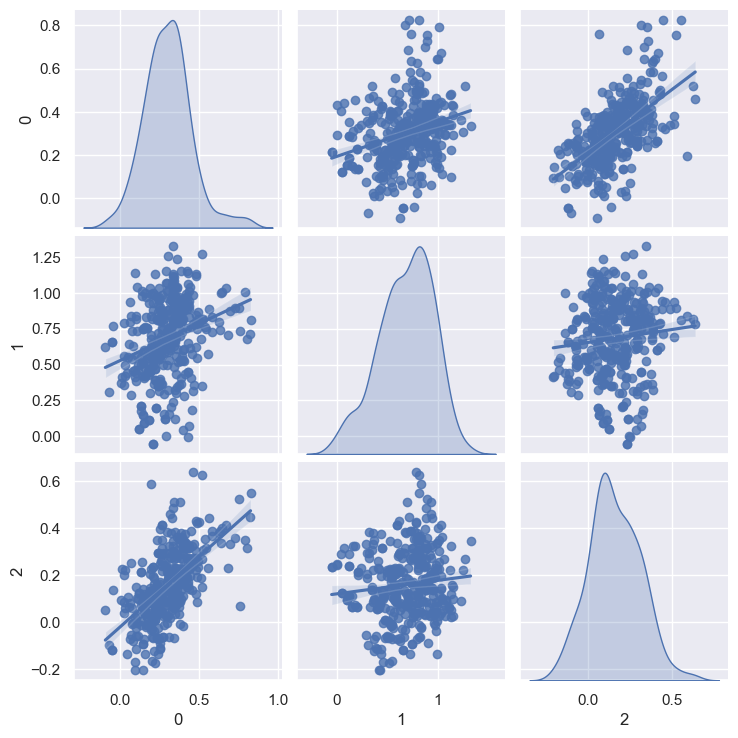

In [35]:
sns.pairplot(DF_X,kind='reg',diag_kind='kde')

<Axes: >

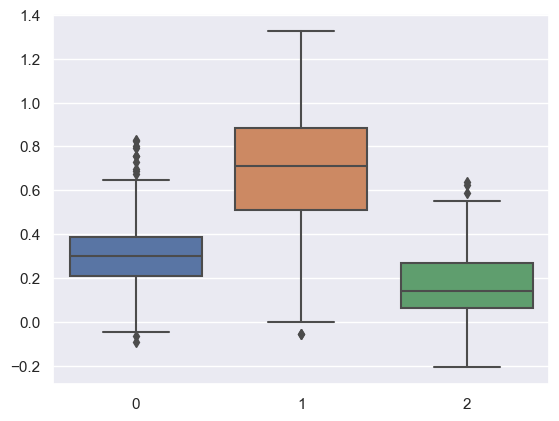

In [36]:
sns.boxplot(DF_X)

<Axes: >

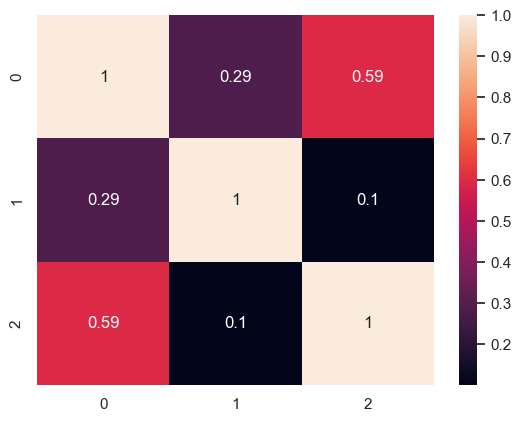

In [37]:
cor = DF_X.corr()
sns.heatmap(cor,annot=True)

Ques 3

In [38]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
data = pd.read_csv('Diabetes.csv')
x= data.iloc[:,1:-1].values
y= data.iloc[:,0].values

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=0,test_size=0.25)

In [41]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain =sc.fit_transform(xtrain)
xtest= sc.transform(xtest)

In [42]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier= DecisionTreeClassifier(criterion='entropy')
DT_classifier.fit(xtrain,ytrain)
ypred= DT_classifier.predict(xtest)

In [43]:
cm_dt= confusion_matrix(ytest,ypred)
as_dt= accuracy_score(ytest,ypred)
print(cm_dt)
print(as_dt)

[[46280  1033  5972]
 [  843    30   260]
 [ 5865   341  2796]]
0.7742983286029643


In [44]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier= RandomForestClassifier(n_estimators=100, criterion='entropy')
RF_classifier.fit(xtrain,ytrain)
ypred_rf= RF_classifier.predict(xtest)

In [45]:
cm_rf= confusion_matrix(ytest,ypred_rf)
as_rf= accuracy_score(ytest,ypred_rf)
print(cm_rf)
print(as_rf)

[[51197    94  1994]
 [ 1004     0   129]
 [ 7119    25  1858]]
0.836565752128666


In [46]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier= KNeighborsClassifier(n_neighbors=8, metric='minkowski')
KNN_classifier.fit(xtrain,ytrain)
ypred_knn= KNN_classifier.predict(xtest)

In [47]:
cm_knn= confusion_matrix(ytest,ypred_knn)
as_knn= accuracy_score(ytest, ypred_knn)
print(cm_knn)
print(as_knn)

[[51887     3  1395]
 [ 1030     1   102]
 [ 7630     1  1371]]
0.8397824030274361


Ques 4

# *Importing the Important Libraries*

In [48]:
#Importing the libraries we would neeed in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# *Importing the Data*

In [49]:
data= pd.read_csv('OJ.csv')

In [50]:
print(data.shape)
data.head()

(1070, 18)


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


## *Encoding the Data and Setting the Data Types*

In [51]:
#Encoding the data values that at non-integers like the Purchase column and Store7 column
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['Purchase']= le.fit_transform(data['Purchase'])
data['Store7']=le.fit_transform(data['Store7'])

data= data.astype('float64')

In [52]:
data.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0.0,237.0,1.0,1.75,1.99,0.00,0.0,0.0,0.0,0.500000,1.99,1.75,0.24,0.0,0.000000,0.000000,0.24,1.0
1,0.0,239.0,1.0,1.75,1.99,0.00,0.3,0.0,1.0,0.600000,1.69,1.75,-0.06,0.0,0.150754,0.000000,0.24,1.0
2,0.0,245.0,1.0,1.86,2.09,0.17,0.0,0.0,0.0,0.680000,2.09,1.69,0.40,0.0,0.000000,0.091398,0.23,1.0
3,1.0,227.0,1.0,1.69,1.69,0.00,0.0,0.0,0.0,0.400000,1.69,1.69,0.00,0.0,0.000000,0.000000,0.00,1.0
4,0.0,228.0,7.0,1.69,1.69,0.00,0.0,0.0,0.0,0.956535,1.69,1.69,0.00,1.0,0.000000,0.000000,0.00,0.0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   float64
 1   WeekofPurchase  1070 non-null   float64
 2   StoreID         1070 non-null   float64
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   float64
 8   SpecialMM       1070 non-null   float64
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   float64
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   f

Exploratory Data Analysis

In [54]:
data.describe()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,0.389720,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.332710,0.059298,0.027314,0.217991,1.630841
std,0.487915,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.471404,0.101760,0.062232,0.107535,1.430387
min,0.000000,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,0.000000,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.000000,0.240000,2.000000
75%,1.000000,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,1.000000,0.112676,0.000000,0.300000,3.000000
max,1.000000,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,1.000000,0.402010,0.252688,0.440000,4.000000


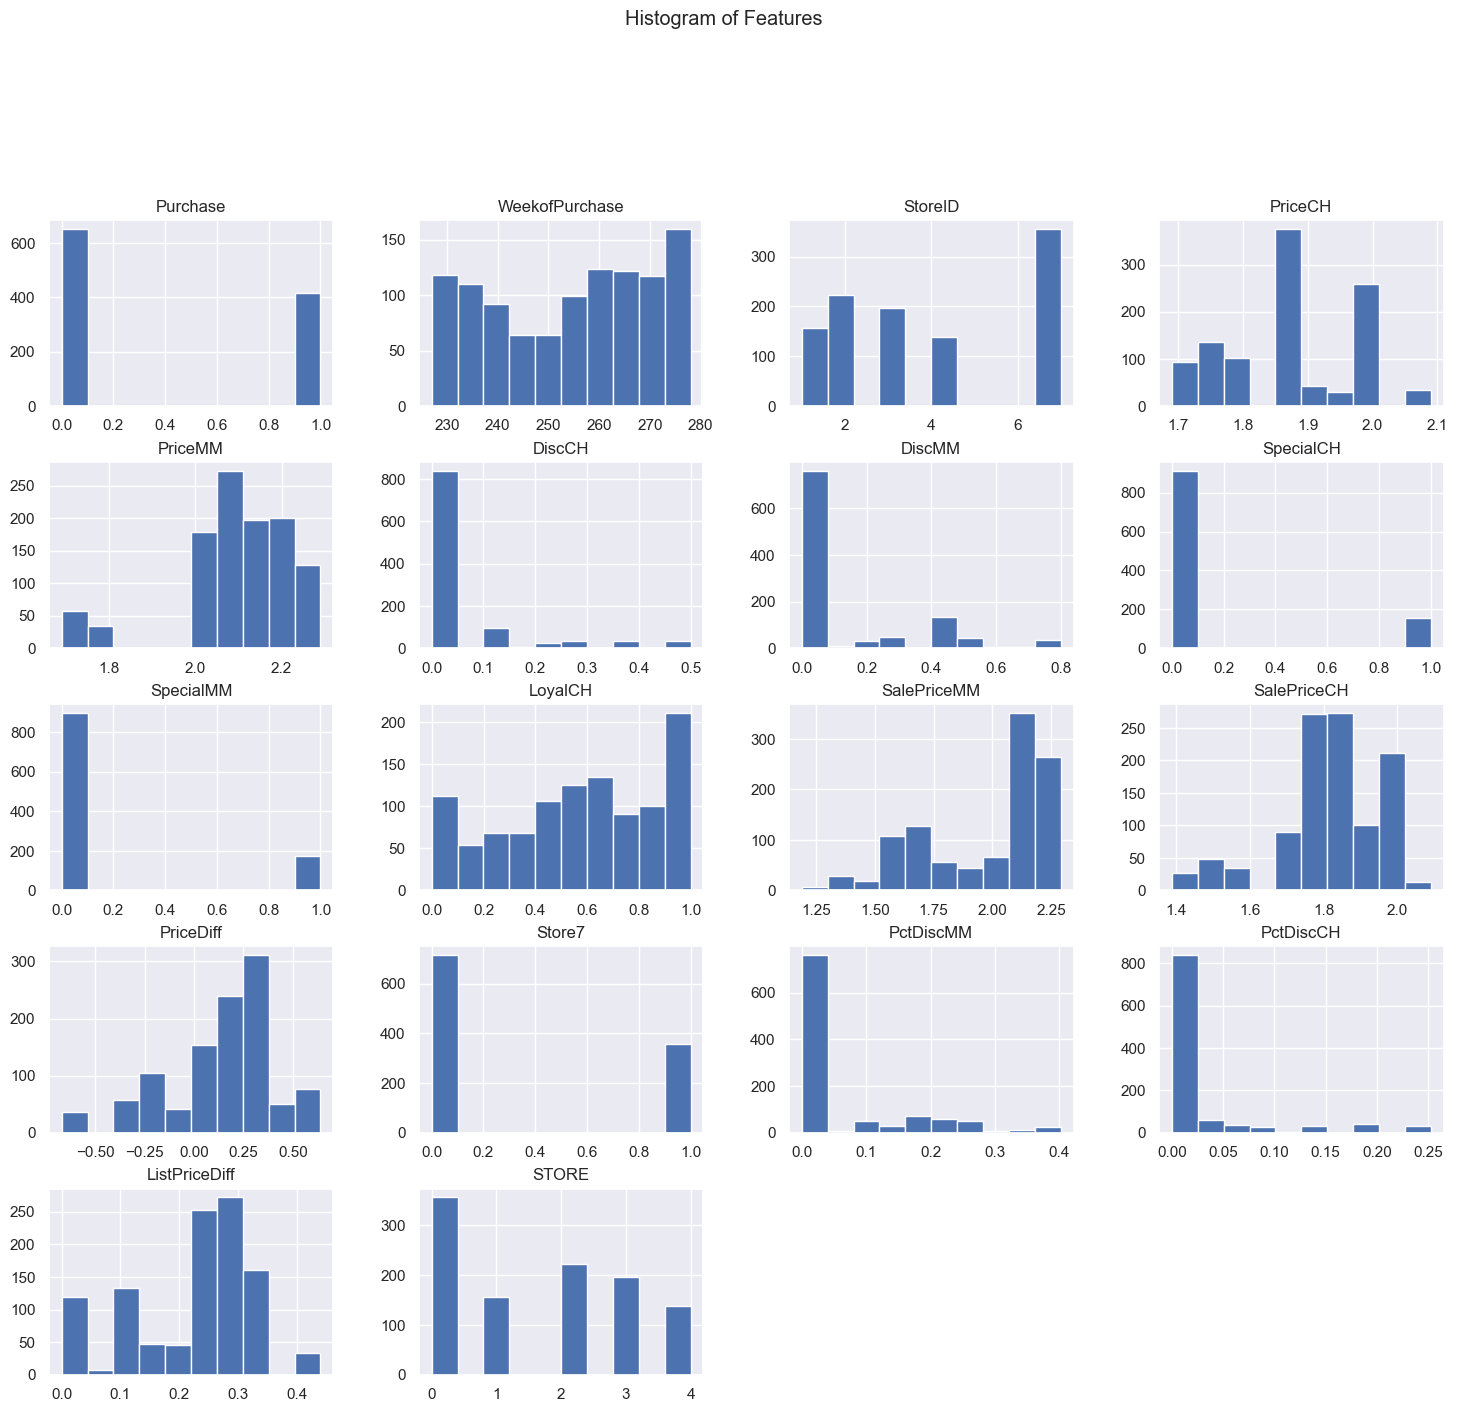

In [55]:
data.hist(figsize=(18,15))
plt.suptitle('Histogram of Features',y=1.02)
plt.show()

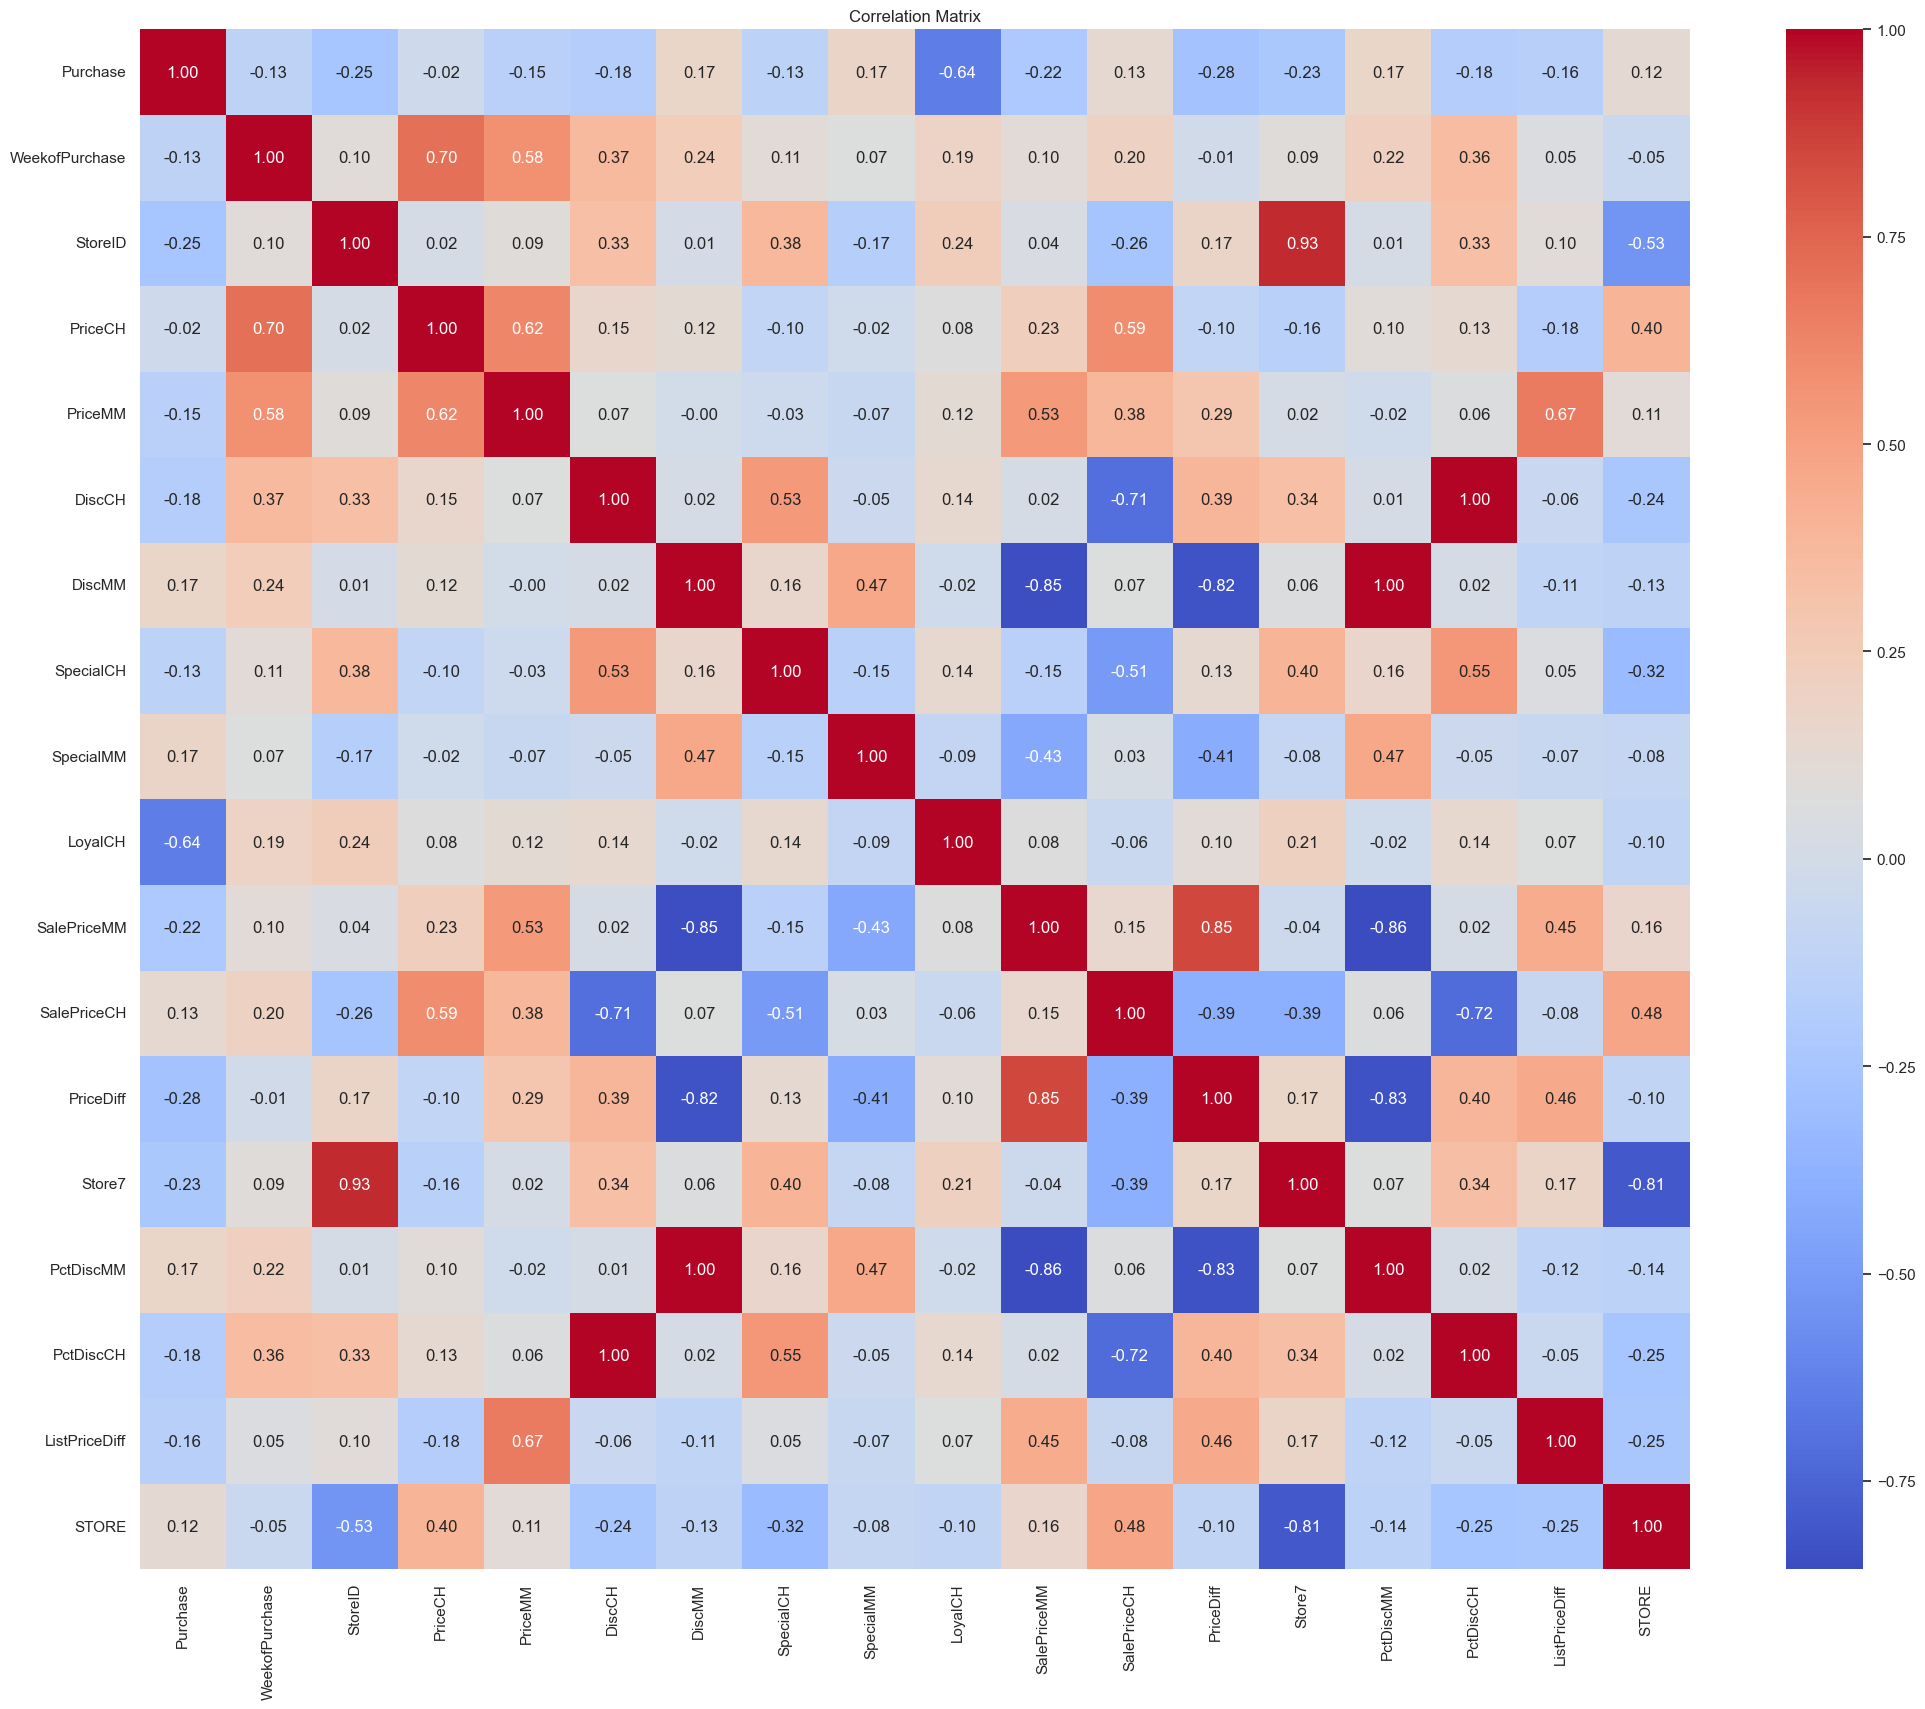

In [56]:
corr_matrix= data.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# *Splitting the Data into Train and Test Sets*

In [57]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

## **Using PCA to Drop the Highly Correlated Columns in the Data**

In [58]:
from sklearn.decomposition import PCA
pca = PCA()
xtrain_pca = pca.fit_transform(xtrain)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Identify the principal components that contribute most to the explained variance
significant_components = [i for i, ratio in enumerate(explained_variance_ratio) if ratio > 1e-8]

# Select only the columns corresponding to significant principal components
xtrain_pca = xtrain_pca[:, significant_components]
xtest_pca = pca.transform(xtest)[:, significant_components]


In [59]:
xtrain_pca.shape

(856, 12)

In [60]:
explained_variance_ratio

array([9.66910305e-01, 2.55234230e-02, 5.35790105e-03, 8.58323068e-04,
       4.98403505e-04, 3.47945994e-04, 3.07648277e-04, 1.08378727e-04,
       6.69503847e-05, 2.06357635e-05, 6.60156427e-08, 1.91439671e-08,
       3.55317559e-31, 1.50370698e-34, 9.71196794e-36, 9.47687792e-36,
       5.15874373e-36])

## *Standard Scaling the Data*

In [61]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain_pca =sc.fit_transform(xtrain_pca)
xtest_pca= sc.transform(xtest_pca)

## **Logistic regression**

Using Logistic Regression Model to make Predictions

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
logistic= LogisticRegression()
logistic.fit(xtrain_pca,ytrain)
ypred_lr= logistic.predict(xtest_pca)

The confusion matrix for logistic regression is 
 [[106  16]
 [ 22  70]]
Accuracy  0.822429906542056
Precision: 0.8220325744403391
Recall: 0.822429906542056
F1 Score: 0.8215679932794289


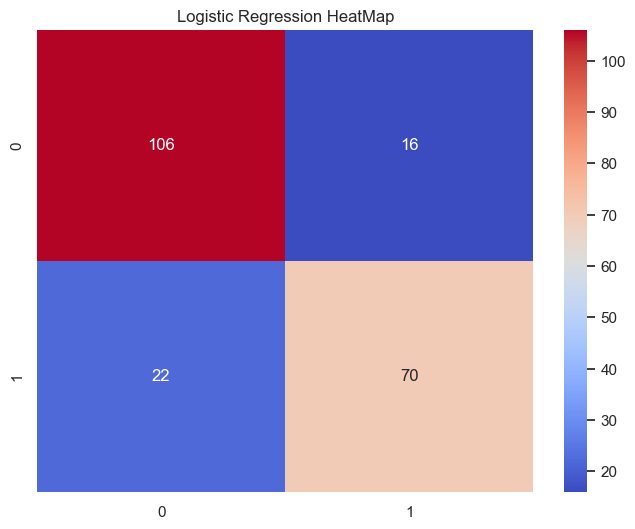

In [65]:
cm_lr= confusion_matrix(ytest,ypred_lr)
print("The confusion matrix for logistic regression is \n", cm_lr)
as_lr= accuracy_score(ytest,ypred_lr)
print("Accuracy ", as_lr)

# Precision, Recall, and F1 Score
precision = precision_score(ytest, ypred_lr, average='weighted')
recall = recall_score(ytest, ypred_lr, average='weighted')
f1 = f1_score(ytest, ypred_lr, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, cmap= 'coolwarm',fmt="d")
plt.title('Logistic Regression HeatMap')
plt.show()

# Using Quadratic Discriminant Analysis to make Predictions

In [66]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda= QuadraticDiscriminantAnalysis()
qda.fit(xtrain_pca,ytrain)
ypred_qda= qda.predict(xtest_pca)

The confusion matrix for QDA is 
 [[97 25]
 [18 74]]
The accuracy for QDA is  0.7990654205607477
Precision: 0.8022057224007652
Recall: 0.7990654205607477
F1 Score: 0.7997800795240039


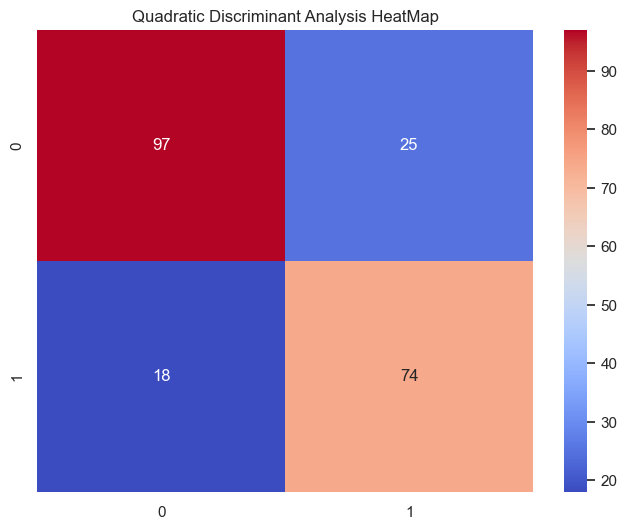

In [67]:
cm_qda= confusion_matrix(ytest,ypred_qda)
as_qda= accuracy_score(ytest,ypred_qda)
print("The confusion matrix for QDA is \n", cm_qda)
print("The accuracy for QDA is ",as_qda)


# Precision, Recall, and F1 Score
precision = precision_score(ytest, ypred_qda, average='weighted')
recall = recall_score(ytest, ypred_qda, average='weighted')
f1 = f1_score(ytest, ypred_qda, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(8,6))
sns.heatmap(cm_qda, annot=True, cmap= 'coolwarm',fmt="d")
plt.title('Quadratic Discriminant Analysis HeatMap')
plt.show()